<a href="https://colab.research.google.com/github/drgulseven/drgulseven/blob/main/NREC4107_Project_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from google.colab import files  # For manual file upload

# Prompt user to upload a CSV file
print("Please choose your CSV file to upload:")
uploaded = files.upload()

# Load the uploaded CSV file into a DataFrame
# Automatically uses the first file uploaded
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Display the first few rows to confirm successful loading
print("File successfully loaded. Preview:")
print(data.head())


Please choose your CSV file to upload:


Saving utown.csv to utown (2).csv
File successfully loaded. Preview:
     price   sqft  age  utown  pool  fplace
0  205.452  23.46    6      0     0       1
1  185.328  20.03    5      0     0       1
2  248.422  27.77    6      0     0       0
3  154.690  20.17    1      0     0       0
4  221.801  26.45    0      0     0       1


In [34]:
# Display dataset info
print(data.info())

# List numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric columns:", list(numeric_columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1000 non-null   float64
 1   sqft    1000 non-null   float64
 2   age     1000 non-null   int64  
 3   utown   1000 non-null   int64  
 4   pool    1000 non-null   int64  
 5   fplace  1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
None
Numeric columns: ['price', 'sqft', 'age', 'utown', 'pool', 'fplace']


In [35]:
# Convert specified columns to categorical variables
data['utown'] = data['utown'].astype('category')
data['pool'] = data['pool'].astype('category')
data['fplace'] = data['fplace'].astype('category')

# Verify the changes
print(data.info())  # Should now list those columns as 'category'

# Display first few rows
print(data.head())

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Select only numeric variables
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

# Show summary statistics
print(data[numeric_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   price   1000 non-null   float64 
 1   sqft    1000 non-null   float64 
 2   age     1000 non-null   int64   
 3   utown   1000 non-null   category
 4   pool    1000 non-null   category
 5   fplace  1000 non-null   category
dtypes: category(3), float64(2), int64(1)
memory usage: 26.9 KB
None
     price   sqft  age utown pool fplace
0  205.452  23.46    6     0    0      1
1  185.328  20.03    5     0    0      1
2  248.422  27.77    6     0    0      0
3  154.690  20.17    1     0    0      0
4  221.801  26.45    0     0    0      1
Missing values per column:
 price     0
sqft      0
age       0
utown     0
pool      0
fplace    0
dtype: int64
Numeric columns: Index(['price', 'sqft', 'age'], dtype='object')
             price        sqft          age
count  1000.000000  1000.00000  1000.000000
mean    24

Correlation Matrix:
           price      sqft       age
price  1.000000  0.594678 -0.079852
sqft   0.594678  1.000000 -0.027183
age   -0.079852 -0.027183  1.000000


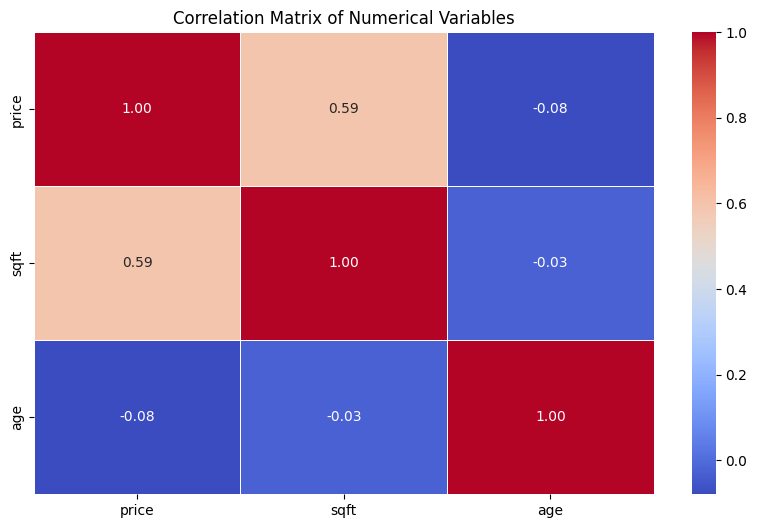

In [36]:
# Step 1: Compute correlation matrix
corr_matrix = data[numeric_columns].corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


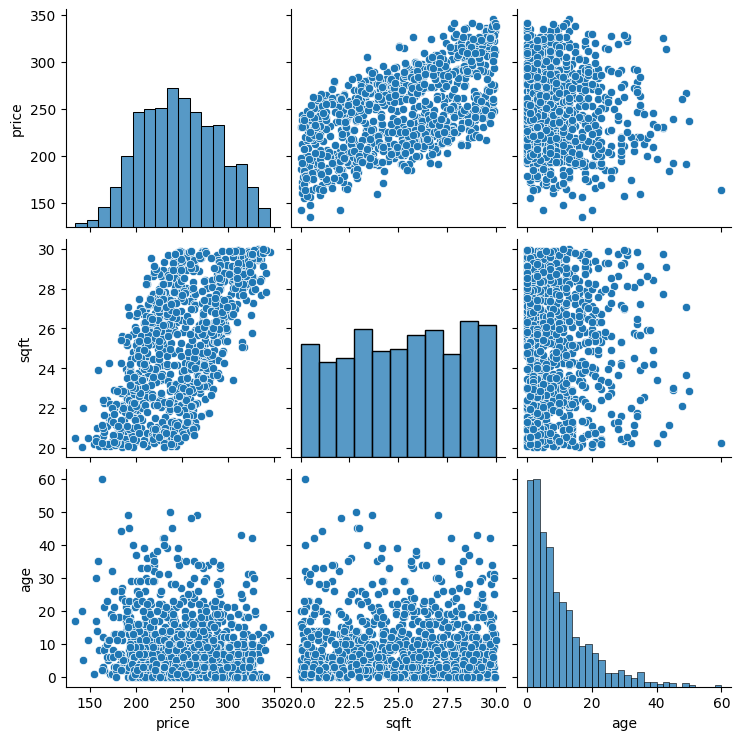

In [37]:
# Step 2: Scatter plot matrix
sns.pairplot(data[numeric_columns])
plt.show()

In [38]:
# Step 3: Identify two strongly correlated variables
strong_corr_pair = corr_matrix.unstack().sort_values(ascending=False)
strong_corr_pair = strong_corr_pair[strong_corr_pair < 1].drop_duplicates()  # Remove 1s (self-correlation)
selected_vars = strong_corr_pair.idxmax()
var_y, var_x = selected_vars

print(f"Selected variables for regression: {var_x} and {var_y}")

Selected variables for regression: price and sqft


In [39]:
# Prepare data for regression
X = data['sqft']  # Independent variable
Y = data['price']    # Dependent variable

# Transformations for different regression models
X_log = np.log(X)
Y_log = np.log(Y)

# Add a constant for statsmodels (intercept term)
X_const = sm.add_constant(X)
X_log_const = sm.add_constant(X_log)

In [40]:
# 1. Linear-Linear Model (Y = β0 + β1X + ε)
lin_model = sm.OLS(Y, X_const).fit()
lin_r2 = lin_model.rsquared
print("\nLinear-Linear Model Summary:\n", lin_model.summary())


Linear-Linear Model Summary:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     546.0
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.13e-96
Time:                        07:56:10   Log-Likelihood:                -4942.5
No. Observations:                1000   AIC:                             9889.
Df Residuals:                     998   BIC:                             9899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9203

In [41]:
# 2. Log-Linear Model (ln(Y) = β0 + β1 (X) + ε)
log_lin_model = sm.OLS(Y_log, X_const).fit()
log_lin_r2 = log_lin_model.rsquared
print("\nLog-Linear Model Summary:\n", log_lin_model.summary())


Log-Linear Model Summary:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     537.5
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.78e-95
Time:                        07:56:12   Log-Likelihood:                 545.70
No. Observations:                1000   AIC:                            -1087.
Df Residuals:                     998   BIC:                            -1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6079   

In [42]:
# 3. Linear-Log Model (Y = β0 + β1 log(X) + ε)
lin_log_model = sm.OLS(Y, X_log_const).fit()
lin_log_r2 = lin_log_model.rsquared
print("\nLinear-Log Model Summary:\n", lin_log_model.summary())


Linear-Log Model Summary:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     537.7
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.71e-95
Time:                        07:56:14   Log-Likelihood:                -4945.2
No. Observations:                1000   AIC:                             9894.
Df Residuals:                     998   BIC:                             9904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -436.4336   

In [43]:
# 4. Log-Log Model (log(Y) = β0 + β1 log(X) + ε)
log_log_model = sm.OLS(Y_log, X_log_const).fit()
log_log_r2 = log_log_model.rsquared
print("\nLog-Log Model Summary:\n", log_log_model.summary())


Log-Log Model Summary:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     534.1
Date:                Mon, 05 May 2025   Prob (F-statistic):           5.45e-95
Time:                        07:56:16   Log-Likelihood:                 544.58
No. Observations:                1000   AIC:                            -1085.
Df Residuals:                     998   BIC:                            -1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6821      

In [44]:
# Dictionary mapping model names to their R² values
r2_values = {
    "Linear-Linear": lin_r2,
    "Log-Linear": log_lin_r2,
    "Linear-Log": lin_log_r2,
    "Log-Log": log_log_r2
}
# Display R² values for all models
print("\nR² values for all models:")
for model, r2 in r2_values.items():
    print(f"{model}: R² = {r2:.4f}")

# Find the best model based on the highest R² value
best_model = max(r2_values, key=r2_values.get)

# Display the best model
print(f"\nBest-fitting model: {best_model} based on R² = {r2_values[best_model]:.4f}")


R² values for all models:
Linear-Linear: R² = 0.3536
Log-Linear: R² = 0.3501
Linear-Log: R² = 0.3501
Log-Log: R² = 0.3486

Best-fitting model: Linear-Linear based on R² = 0.3536
